In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = np.load('/content/drive/MyDrive/images.npy')
print('Original size:',data.shape)

# Drop last three for convinence
new_data_train = data[:-3]
new_data_test = data[:-3]
print('New train & test size:',new_data_train.shape,new_data_test.shape)

Original size: (1153, 245, 329, 1)
New train & test size: (1150, 245, 329, 1) (1150, 245, 329, 1)


In [ ]:
# reshape to (batch_size, time_steps, height, width, filters (layers)
new_data_train = np.reshape(new_data_train,(230,5,245,329,1))
new_data_test = np.reshape(new_data_train,(230,5,245,329,1))

new_data_train = new_data_train / 255
new_data_test = new_data_test / 255

print('New train & test size:',new_data_train.shape,new_data_test.shape)

New train & test size: (230, 5, 245, 329, 1) (230, 5, 245, 329, 1)


In [ ]:
from keras.metrics import CosineSimilarity
seq = Sequential()

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 245, 329, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(5, 5),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(5, 5),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))

seq.compile(loss='binary_crossentropy', optimizer='adam',metrics=[CosineSimilarity()])

seq.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_12 (ConvLSTM2D)  (None, None, 245, 329, 4  59200    
                             0)                                  
                                                                 
 batch_normalization_12 (Bat  (None, None, 245, 329, 4  160      
 chNormalization)            0)                                  
                                                                 
 conv_lstm2d_13 (ConvLSTM2D)  (None, None, 245, 329, 4  320160   
                             0)                                  
                                                                 
 batch_normalization_13 (Bat  (None, None, 245, 329, 4  160      
 chNormalization)            0)                                  
                                                                 
 conv_lstm2d_14 (ConvLSTM2D)  (None, None, 245, 329, 4

In [ ]:
history = seq.fit(new_data_train, new_data_test, batch_size=2, epochs=3, validation_split=0.1)

Epoch 1/3
104/104 [==============================] - 783s 7s/step - loss: 0.5639 - cosine_similarity: 1.0000 - val_loss: 0.8226 - val_cosine_similarity: 1.0000
Epoch 2/3
104/104 [==============================] - 775s 7s/step - loss: 0.5465 - cosine_similarity: 1.0000 - val_loss: 1.1040 - val_cosine_similarity: 1.0000
Epoch 3/3
104/104 [==============================] - 766s 7s/step - loss: 0.5453 - cosine_similarity: 1.0000 - val_loss: 0.9881 - val_cosine_similarity: 1.0000


In [ ]:
seq.save('/content/drive/MyDrive/images_seq.h5')
print("model saved")

model saved


In [ ]:
which = 100 # record to inspect
track = new_data_train[which][:3, ::, ::, ::]

In [ ]:
track.shape, track[np.newaxis, ::, ::, ::, ::].shape

((3, 245, 329, 1), (1, 3, 245, 329, 1))

In [ ]:
for j in range(6):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::]) # (1, 3, 245, 329, 1)
    new = new_pos[::, -1, ::, ::, ::] # (1, 245, 329, 1)
    track = np.concatenate((track, new), axis=0) # adds +1 to the first dimension in each loop cycle

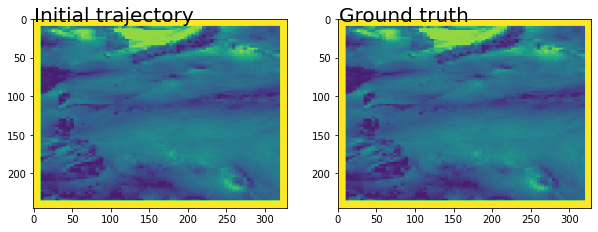

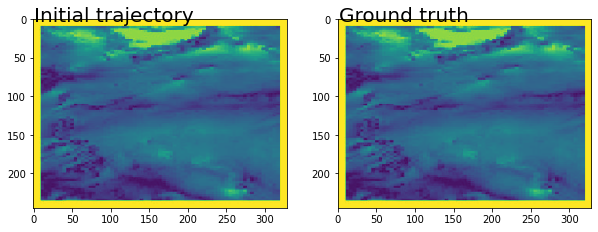

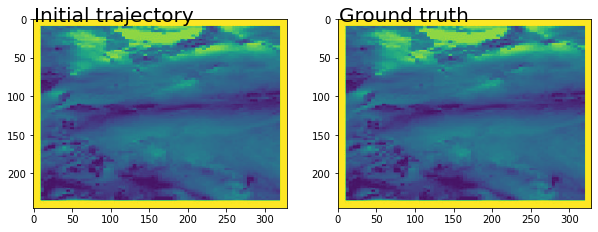

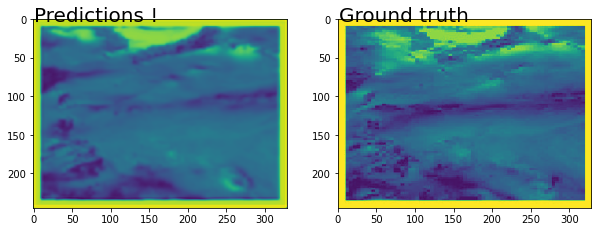

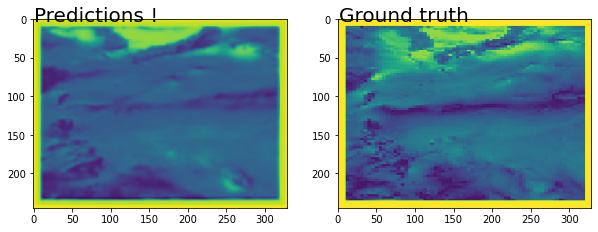

In [ ]:
track2 = new_data_train[which][::, ::, ::, ::]

for i in range(5):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 3:
        ax.text(1, 3, 'Predictions !', fontsize=20)#, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 3:
        toplot = new_data_test[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    #plt.savefig('%i_animate.png' % (i + 1))

In [ ]:
'''
plt.figure(1)
plt.plot(history.history['CosineSimilarity'])
plt.plot(history.history['val_CosineSimilarity'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
'''

"\nplt.figure(1)\nplt.plot(history.history['CosineSimilarity'])\nplt.plot(history.history['val_CosineSimilarity'])\nplt.title('model loss')\nplt.ylabel('loss')\nplt.xlabel('epoch')\nplt.legend(['train', 'val'], loc='upper left')\nplt.show()\n\nplt.figure(2)\nplt.plot(history.history['loss'])\nplt.plot(history.history['val_loss'])\nplt.title('model loss')\nplt.ylabel('loss')\nplt.xlabel('epoch')\nplt.legend(['train', 'val'], loc='upper left')\nplt.show()\n"